In [11]:
from matplotlib import pyplot as plt
from pandas import pandas as pd
import numpy as np
plt.style.use(['science' , 'notebook', 'grid'])

## Introdução

Nesse jupyter notebook estamos trabalhando com detecções de aglomerados simulados.
Há uma tabela de aglomerados simulados que foram inseridos em um campo estelar, e outra tabela
de detecções, onde já foi feito um match posicional entre os aglomerados simulados e os detectados.
Abaixo são lidas as informações a respeito apenas das detecções.

In [4]:
RA, DEC, wrad, DistDet_kpc, m_M_det, SNR, wave_peak, \
Dist2object_arcmin, hlr_times_3_arcmin, SNR_rank, \
Wave_r3, DistSimulation_kpc, m_M_simulation, M_m_Det_minus_Sim, \
SNR_est = np.loadtxt('Planilhadetecção.txt', usecols=(1,2,3,4,5,6,7,9,10,12,13,14,16,17,18), unpack=True)

In [5]:
Name, Class = np.loadtxt('Planilhadetecção.txt', usecols=(8, 11), dtype=str, unpack=True)

In [6]:
N, HPX64, N0_order = np.loadtxt('Planilhadetecção.txt', usecols=(0, 15, 19), dtype=int, unpack=True)

Abaixo é criada uma condicional onde os aglomerados deram match com os simulados (confirmados)
e onde os aglomerados são apenas candidatos.

In [7]:
real_det = (Class == 'conf')
false_positive = (Class == 'cand')

Abaixo podemos ver a distribuição no céu destes aglomerados detectados. Os que estão em
azul são os aglomerados simulados, e aqueles em vermelho são os candidatos.

Text(0.5, 1.0, 'Spatial distribution of clusters detected by Gawa wrt SNR')

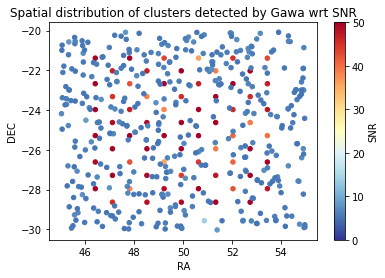

In [9]:
cm = plt.cm.get_cmap('RdYlBu_r')
sc = plt.scatter(RA, DEC, c= SNR, vmin=0, vmax=50,  s=20, cmap=cm)
plt.colorbar(sc,label = 'SNR')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Spatial distribution of clusters detected by Gawa wrt SNR')

A partir disso, podemos fazer um histograma para cada tipo de objetos detectados, considerado as detecções simuladas, reais e os falsos positivos (A,B E C nas legendas respectivamente). O primeiro gráfico diz respeito ao Numeros de Clusters detectados e Distância em KPC.

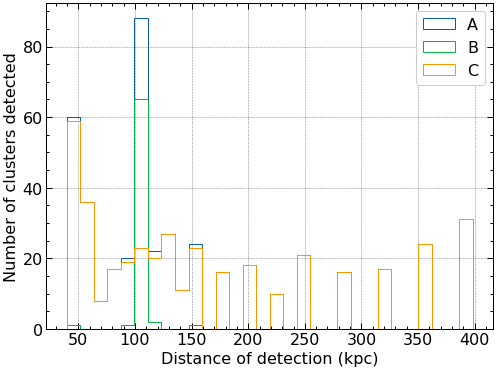

In [113]:
A = plt.hist(DistDet_kpc, bins=30, range=(np.min(DistDet_kpc), np.max(DistDet_kpc)), histtype='step', label='All detections')
B = plt.hist(DistDet_kpc[real_det], bins=30, range=(np.min(DistDet_kpc), np.max(DistDet_kpc)), histtype='step', label='True clusters')
C = plt.hist(DistDet_kpc[false_positive], bins=30, range=(np.min(DistDet_kpc), np.max(DistDet_kpc)), histtype='step', label='False Positive')
plt.xlabel('Distance of detection (kpc)')
plt.ylabel('Number of clusters detected')
plt.legend('ABC')

In [ ]:
Assim, podemos calcular a pureza da detecção que é dada pelo Número de clusters simulados / Número de clusters detectados, 
pela Distancia em KPC

C:\Users\User\AppData\Local\Temp/ipykernel_10300/403379735.py:1: RuntimeWarning: invalid value encountered in true_divide
  pureness = B[0] / A[0]


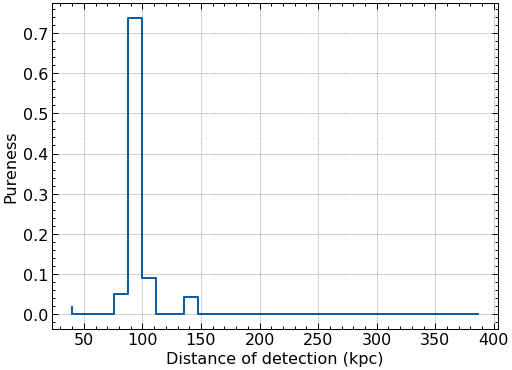

In [57]:
pureness = B[0] / A[0]
plt.step(A[1][0:-1], np.nan_to_num(pureness))
plt.xlabel('Distance of detection (kpc)')
plt.ylabel('Pureness')
plt.show()

Esse processo foi repetido para todos os dados da tabela de Detecção, a seguir um exemplo para o Módulo de distância da detecção

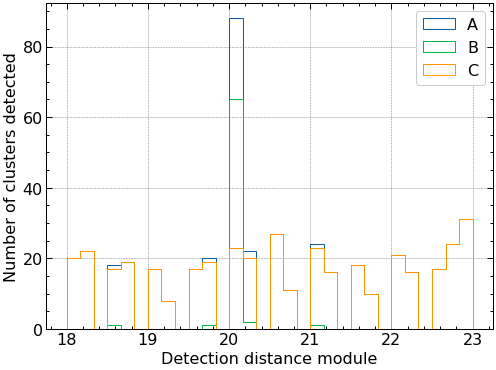

In [60]:
A = plt.hist(m_M_det, bins=30, range=(np.min(m_M_det), np.max(m_M_det)), histtype='step', label='All detections')
B = plt.hist(m_M_det[real_det], bins=30, range=(np.min(m_M_det), np.max(m_M_det)), histtype='step', label='True clusters')
C = plt.hist(m_M_det[false_positive], bins=30, range=(np.min(m_M_det), np.max(m_M_det)), histtype='step', label='False Positive')
plt.xlabel('Detection distance module')
plt.ylabel('Number of clusters detected')
plt.legend('ABC')

C:\Users\User\AppData\Local\Temp/ipykernel_10300/323784056.py:1: RuntimeWarning: invalid value encountered in true_divide
  pureness = B[0] / A[0]


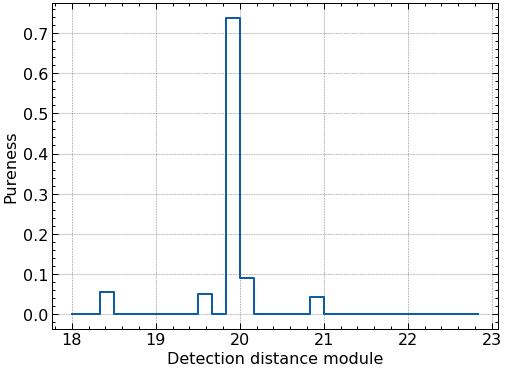

In [61]:
pureness = B[0] / A[0]
plt.step(A[1][0:-1], np.nan_to_num(pureness))
plt.xlabel('Detection distance module')
plt.ylabel('Pureness')
plt.show()

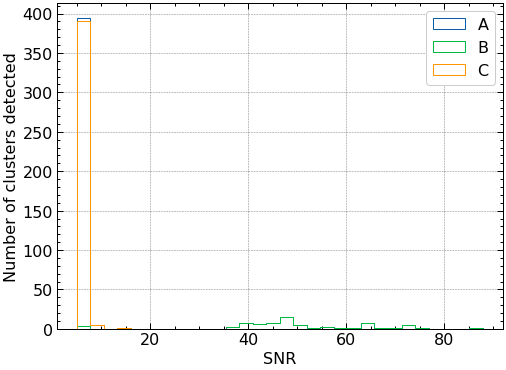

In [63]:
A = plt.hist(SNR, bins=30, range=(np.min(SNR), np.max(SNR)), histtype='step', label='All detections')
B = plt.hist(SNR[real_det], bins=30, range=(np.min(SNR), np.max(SNR)), histtype='step', label='True clusters')
C = plt.hist(SNR[false_positive], bins=30, range=(np.min(SNR), np.max(SNR)), histtype='step', label='False Positive')
plt.xlabel('SNR')
plt.ylabel('Number of clusters detected')
plt.legend('ABC')

C:\Users\User\AppData\Local\Temp/ipykernel_10300/730245600.py:1: RuntimeWarning: invalid value encountered in true_divide
  pureness = B[0] / A[0]


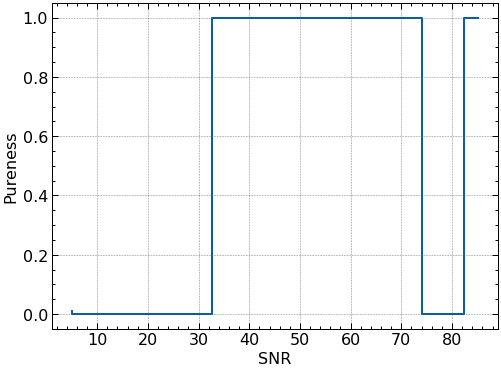

In [64]:
pureness = B[0] / A[0]
plt.step(A[1][0:-1], np.nan_to_num(pureness))
plt.xlabel('SNR')
plt.ylabel('Pureness')
plt.show()

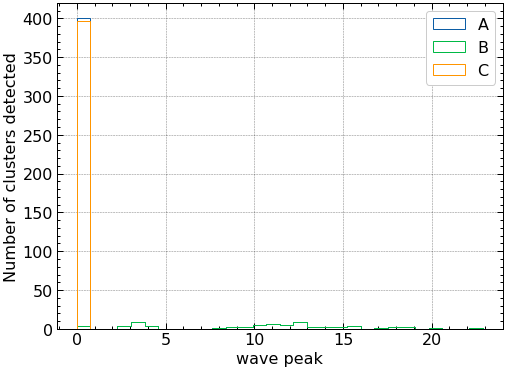

In [65]:
A = plt.hist(wave_peak, bins=30, range=(np.min(wave_peak), np.max(wave_peak)), histtype='step', label='All detections')
B = plt.hist(wave_peak[real_det], bins=30, range=(np.min(wave_peak), np.max(wave_peak)), histtype='step', label='True clusters')
C = plt.hist(wave_peak[false_positive], bins=30, range=(np.min(wave_peak), np.max(wave_peak)), histtype='step', label='False Positive')
plt.xlabel('wave peak')
plt.ylabel('Number of clusters detected')
plt.legend('ABC')

C:\Users\User\AppData\Local\Temp/ipykernel_10300/278268956.py:1: RuntimeWarning: invalid value encountered in true_divide
  pureness = B[0] / A[0]


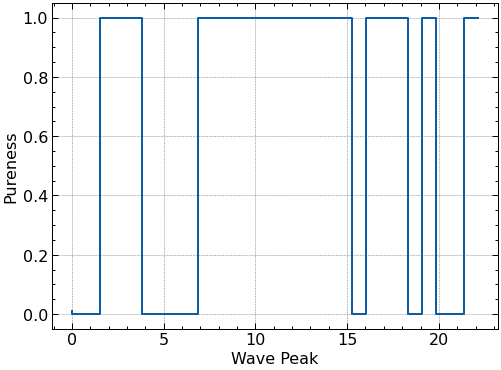

In [66]:
pureness = B[0] / A[0]
plt.step(A[1][0:-1], np.nan_to_num(pureness))
plt.xlabel('Wave Peak')
plt.ylabel('Pureness')
plt.show()

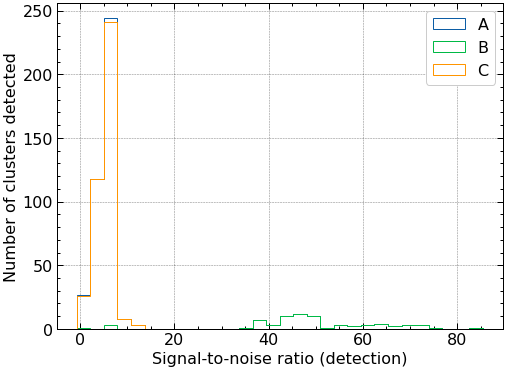

In [67]:
A = plt.hist(SNR_rank, bins=30, range=(np.min(SNR_rank), np.max(SNR_rank)), histtype='step', label='All detections')
B = plt.hist(SNR_rank[real_det], bins=30, range=(np.min(SNR_rank), np.max(SNR_rank)), histtype='step', label='True clusters')
C = plt.hist(SNR_rank[false_positive], bins=30, range=(np.min(SNR_rank), np.max(SNR_rank)), histtype='step', label='False Positive')
plt.xlabel('Signal-to-noise ratio (detection)')
plt.ylabel('Number of clusters detected')
plt.legend('ABC')

C:\Users\User\AppData\Local\Temp/ipykernel_10300/3336408705.py:1: RuntimeWarning: invalid value encountered in true_divide
  pureness = B[0] / A[0]


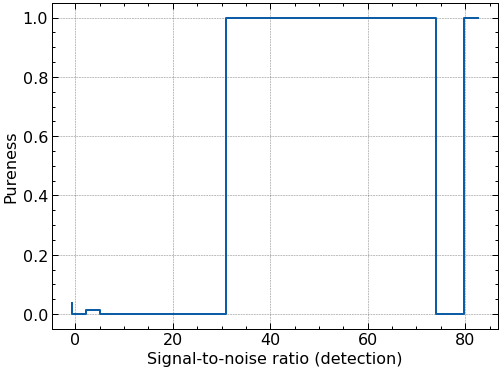

In [69]:
pureness = B[0] / A[0]
plt.step(A[1][0:-1], np.nan_to_num(pureness))
plt.xlabel('Signal-to-noise ratio (detection)')
plt.ylabel('Pureness')
plt.show()

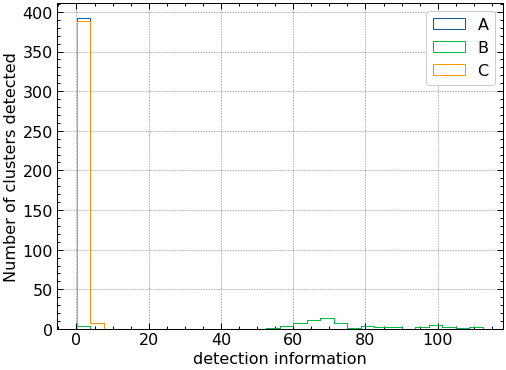

In [70]:
A = plt.hist(Wave_r3, bins=30, range=(np.min(Wave_r3), np.max(Wave_r3)), histtype='step', label='All detections')
B = plt.hist(Wave_r3[real_det], bins=30, range=(np.min(Wave_r3), np.max(Wave_r3)), histtype='step', label='True clusters')
C = plt.hist(Wave_r3[false_positive], bins=30, range=(np.min(Wave_r3), np.max(Wave_r3)), histtype='step', label='False Positive')
plt.xlabel('detection information')
plt.ylabel('Number of clusters detected')
plt.legend('ABC')

C:\Users\User\AppData\Local\Temp/ipykernel_10300/1791716483.py:1: RuntimeWarning: invalid value encountered in true_divide
  pureness = B[0] / A[0]


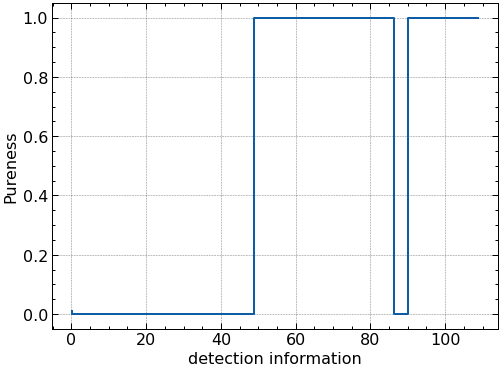

In [71]:
pureness = B[0] / A[0]
plt.step(A[1][0:-1], np.nan_to_num(pureness))
plt.xlabel('detection information')
plt.ylabel('Pureness')
plt.show()

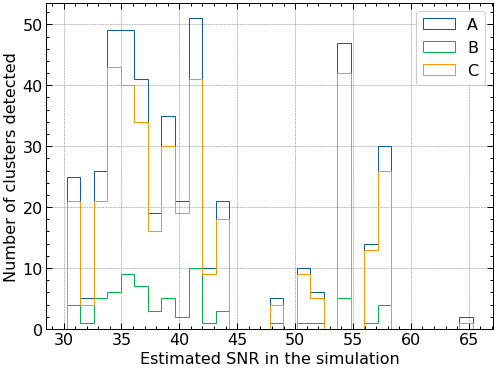

In [72]:
A = plt.hist(SNR_est, bins=30, range=(np.min(SNR_est), np.max(SNR_est)), histtype='step', label='All detections')
B = plt.hist(SNR_est[real_det], bins=30, range=(np.min(SNR_est), np.max(SNR_est)), histtype='step', label='True clusters')
C = plt.hist(SNR_est[false_positive], bins=30, range=(np.min(SNR_est), np.max(SNR_est)), histtype='step', label='False Positive')
plt.xlabel('Estimated SNR in the simulation')
plt.ylabel('Number of clusters detected')
plt.legend('ABC')

C:\Users\User\AppData\Local\Temp/ipykernel_10300/944185792.py:1: RuntimeWarning: invalid value encountered in true_divide
  pureness = B[0] / A[0]


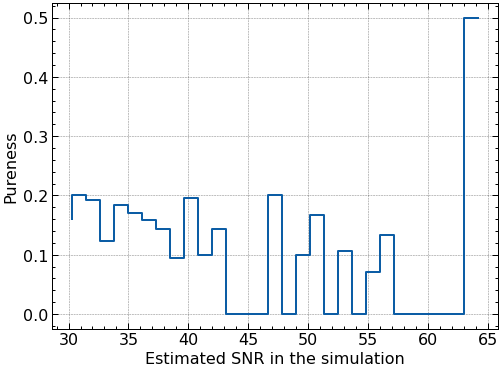

In [73]:
pureness = B[0] / A[0]
plt.step(A[1][0:-1], np.nan_to_num(pureness))
plt.xlabel('Estimated SNR in the simulation')
plt.ylabel('Pureness')
plt.show()

In [79]:
pd.read_csv('simulacao.txt', sep=',')

,# N\tipix\tNstar\tM_V\tSNR\tL\tB\tRA_pix\tDEC_pix\tr_exp\tellpa\tmass\tdist
0,35934\t11670\t-8.54\t6980.01\t224.9017\t-54.88...
1,35935\t12880\t-8.62\t8221.57\t223.8905\t-54.17...
2,35949\t11765\t-8.55\t7760.97\t224.1263\t-58.56...
3,35950\t12834\t-8.66\t8609.50 223.8880\t-59.790...
4,35951\t10998\t-8.48\t6888.75 222.6922\t-59.103...
...,...
61,36234\t11780\t-8.55\t7574.74 211.9017\t-57.284...
62,36235\t11573\t-8.53\t7823.27 211.1203\t-56.473...
63,36236\t12833\t-8.64\t8419.60 211.8088\t-55.222...
64,36240\t12622\t-8.62\t8920.58 213.1195\t-52.719...


In [98]:
Nstar, M_V, SNR, L, B, RA_pix, DEC_pix, r_exp, ellpa, mass, dist = np.loadtxt('simulacao.txt', usecols=(2,3,4,5,6,7,8,9,10,11,12) , unpack=True)

In [92]:
N, ipix = np.loadtxt('simulacao.txt', usecols=(0, 1), dtype=int, unpack=True)

In [94]:
real_det = (Class == 'conf')
false_positive = (Class == 'cand')

Text(0, 0.5, 'Number of clusters detected')

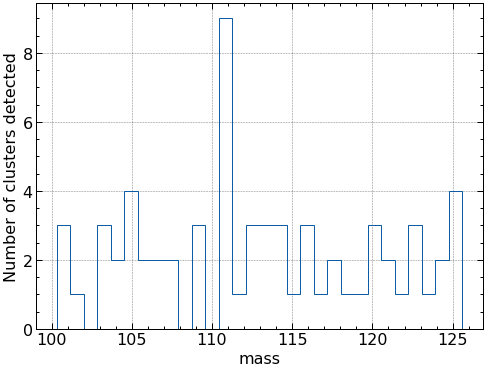

In [115]:
A = plt.hist(mass, bins=30, range=(np.min(mass), np.max(mass)), histtype='step', label='All detections')
plt.xlabel('mass')
plt.ylabel('Number of clusters detected')

Text(0, 0.5, 'Number of clusters detected')

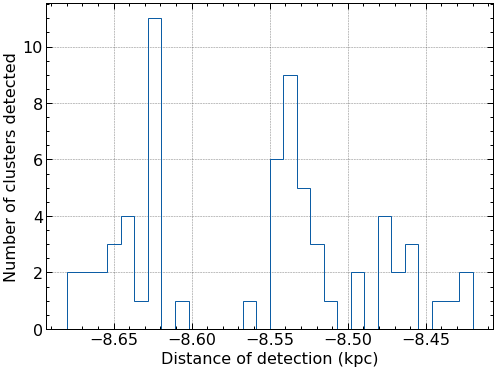

In [108]:
A = plt.hist(Nstar, bins=30, range=(np.min(Nstar), np.max(Nstar)), histtype='step', label='All detections')
plt.xlabel('Distance of detection (kpc)')
plt.ylabel('Number of clusters detected')